BitPredict : timeseries forecasting model to predict price of bitcoin

In [ ]:
#get the data of bitcoin and visualize it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-12-27 07:25:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-12-27 07:25:33 (7.25 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
len(df)

2787

In [ ]:
# in timeseries data problems, the data set is usually less
#in this case , the data is daily data => 365*8 years == 

#seasonality :it has seasonality of daily or value of 365 (per day)
# we only want closing price for each day

In [ ]:
bitcoin_prices= pd.DataFrame(df["Closing Price (USD)"])
bitcoin_prices

,Closing Price (USD)
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


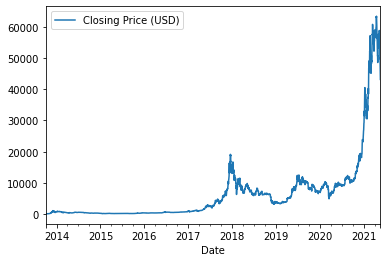

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()

In [ ]:
# importing timeseries data with pythons csv module
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader) #skips first line ie the column titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) #get the dates as date and not strings
    btc_price.append(float(line[2]))

# view 10 of each
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

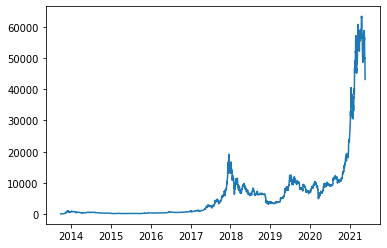

In [ ]:
# plot from csv
import numpy as np
plt.plot(timesteps,btc_price)

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Closing Price (USD)"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# # wrong way to make splits

# # this will randomly split the data, hence the test samples will be mixed with the training data=> data leakage

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test= train_test_split(timesteps,
#                                                 prices,
#                                                 test_size=0.2,
#                                                 random_state=42)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
# we need to split the data by dividing the time with two ranges, one for training(2013-2019) and test(2019-2021)
split_size=int(0.8*len(prices))

#create train data splits (everything before the split)
X_train,y_train= timesteps[:split_size],prices[:split_size]


#create train data splits (everything after the split)
X_test,y_test=timesteps[split_size:],prices[split_size:]



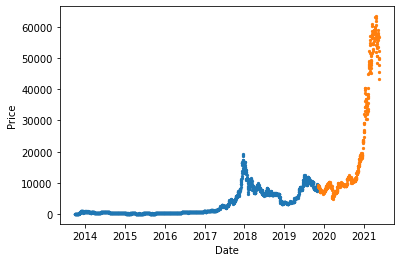

In [ ]:
# plot correctly made splits
plt.scatter(X_train,y_train,s=5,label="training_data")
plt.scatter(X_test,y_test,s=5,label="testing_data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)
     


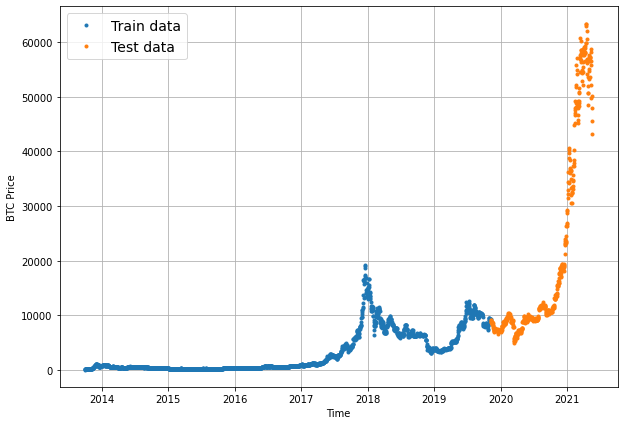

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Baseline model 0 : naive model

naive model states that the prediction will simply be the previous timestep value.ie y(prediction) on 4th april = y on 3rd april

In [ ]:
#create a naive forecast
naive_forecast= y_test[:-1] #naive_forecast will have all the values of y_test except for the last one
naive_forecast[-10:],y_test[-10:]

(array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

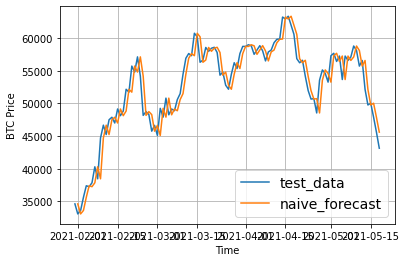

In [ ]:
# plot_time_series(X_train,y_train,label="train_data")
plot_time_series(X_test,y_test,label="test_data",format="-",start=450)
plot_time_series(X_test[1:],naive_forecast,label="naive_forecast",format="-",start=450)

# the naive forecast just has a lag of value,hence the lines dont perfectly match


In [ ]:
# we are predicting a number, this means that it is a form of a regression problem
# the metrics for evaluating will be same as regression problem

# some metrics for evaluation are:
# 1. MSE
# 2. MAE

# basically we are trying to evaluate how much our prediction is wrong wrt to our actual value

# metrics for time series evaluation are;
# 1. MAPE
# 2. MASE


In [ ]:
# implementing MASE using tensorflow
import tensorflow as tf

# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast).numpy()

0.9995699939182624

In [ ]:
#create a function to evaluate a model on all the metrices

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results=evaluate_preds(y_test[1:],naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# format data part 2 : windowing our dataset
# we window our timeseries data to turn our data into supervised learning problem

print(f"using this {btc_price[:7]} we want to predict {btc_price[7]}")

using this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] we want to predict 123.033


In [ ]:
HORIZON=1 #predict next one day
WINDOW_SIZE=7 #use past week data to predict the horizon

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
     



In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


# make preprocessing function to create windows

our function will:
1. create a window step of a specific window size
2. use numpy indexing to create 2d array of multiple window steps, eg: 
[
    [1,2,3,4,5,6],
    [2,3,4,5,6,7],
    [3,4,5,6,7,8],
    .....
]
3. uses the 2d array that is made to index on a target 
4. uses get_labelled_windows() we created above to turn the window steps into windows with a specific horizon

In [ ]:
import numpy as np
# create function to view numpy arrays as windows
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
  """
    converts a 1d array into a 2d sequential array of sliding windows of widow_size and with horizon size label
  """
  # create a window step of a specific window size
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)

  # create a 2d array of multiple window steps
  window_indexes=window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
  print(window_indexes)

  windowed_array=x[window_indexes]

  windows,labels=get_labelled_windows(windowed_array,horizon)

  return windows,labels


In [ ]:
full_windows,full_labels=make_windows(prices,WINDOW_SIZE,HORIZON)


[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


In [ ]:
for i in range(3):
  print(f"window : {full_windows[i]} label -> {full_labels[i]}")

window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] label -> [123.033]
window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] label -> [124.049]
window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] label -> [125.96116]


In [ ]:
make_windows(prices)

[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2224, 556, 2224, 556)

In [ ]:
# create a modelling check point callback ,because number of epochs will be more in this case
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

model 1: simple dense model
* single dense layer with 128 hidden neurons
* output layer with linear activation function
* adam optimizer, mae loss finction
* batch size of 128
* 100 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

# 1.construct the model
model_1=tf.keras.Sequential([
    
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_1_dense")

# 2.compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"]
                )

# 3. fit the model

model_1.fit(x=train_windows,y=train_labels,verbose=1,batch_size=128,epochs=100,validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 84ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 53ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 50ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 58ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 58ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 59ms/step - loss: 158.5

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
# load in the best saved model 1 and evaluate its performance
model_1=tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

making forecast on the test dataset

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:

# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]
     

18/18 [==============================] - 0s 1ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:

# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 1082.4711,
 'mape': 2.5448983,
 'mase': 0.9994894}

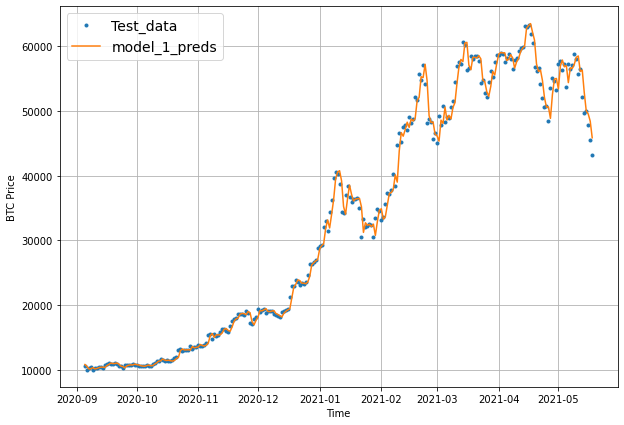

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
# model 2: window size=30 horizon=1

HORIZON=1
WINDOW_SIZE=30

In [ ]:
full_windows,full_labels=make_windows(prices,WINDOW_SIZE,HORIZON)

# MAKE TRAIN AND TEST
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels,0.2)



[[   0    1    2 ...   28   29   30]
 [   1    2    3 ...   29   30   31]
 [   2    3    4 ...   30   31   32]
 ...
 [2754 2755 2756 ... 2782 2783 2784]
 [2755 2756 2757 ... 2783 2784 2785]
 [2756 2757 2758 ... 2784 2785 2786]]


In [ ]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

# 1.construct the model
model_2=tf.keras.Sequential([
    
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_2_dense")

# 2.compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"]
                )

# 3. fit the model

history_model_2=model_2.fit(x=train_windows,
                            y=train_labels,
                            verbose=1,
                            batch_size=128,
                            epochs=100,
                            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [ ]:
model_2=tf.keras.models.load_model("/content/model_experiments/model_2_dense")

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results
     

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 1128.4329,
 'mape': 2.726445,
 'mase': 1.0590738}

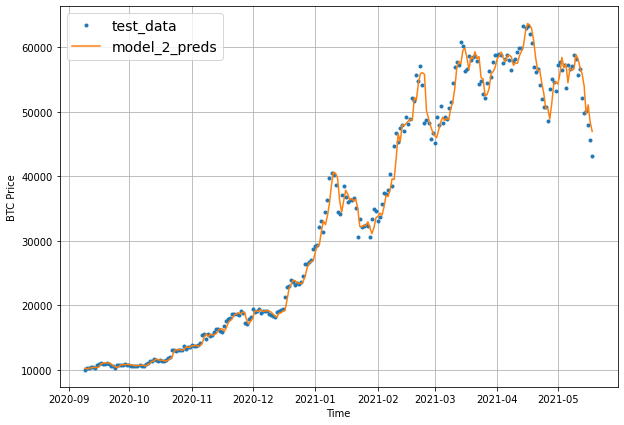

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 
     

model 3: horizon=3, windows=30

In [ ]:
HORIZON=7
WINDOW_SIZE=30

full_windows,full_labels=make_windows(prices,WINDOW_SIZE,HORIZON)

# MAKE TRAIN AND TEST
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels,0.2)


[[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [2748 2749 2750 ... 2782 2783 2784]
 [2749 2750 2751 ... 2783 2784 2785]
 [2750 2751 2752 ... 2784 2785 2786]]


In [ ]:
test_labels

array([[ 8794.35864452,  8798.04205463,  9081.18687849, ...,
         8760.89271814,  8749.52059102,  8656.97092235],
       [ 8798.04205463,  9081.18687849,  8711.53433917, ...,
         8749.52059102,  8656.97092235,  8500.64355816],
       [ 9081.18687849,  8711.53433917,  8760.89271814, ...,
         8656.97092235,  8500.64355816,  8469.2608989 ],
       ...,
       [58102.19142623, 55715.54665129, 56573.5554719 , ...,
        49764.1320816 , 50032.69313676, 47885.62525472],
       [55715.54665129, 56573.5554719 , 52147.82118698, ...,
        50032.69313676, 47885.62525472, 45604.61575361],
       [56573.5554719 , 52147.82118698, 49764.1320816 , ...,
        47885.62525472, 45604.61575361, 43144.47129086]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

#set random seed
tf.random.set_seed(42)

# 1.construct the model
model_3=tf.keras.Sequential([
    
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_3_dense")

# 2.compile the model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"]
                )

# 3. fit the model

history_model_2=model_3.fit(x=train_windows,
                            y=train_labels,
                            verbose=1,
                            batch_size=128,
                            epochs=100,
                            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 1476.6752 - mae: 1476.6752 - mse: 10390733.0000 - val_loss: 3088.5613 - val_mae: 3088.5613 - val_mse: 24386346.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 552.8943 - mae: 552.8943 - mse: 1336176.8750 - val_loss: 2462.4548 - val_mae: 2462.4548 - val_mse: 17112268.0000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 435.1978 - mae: 435.1978 - mse: 893449.0000 - val_loss: 2283.1484 - val_mae: 2283.1484 - val_mse: 14950889.0000
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 391.9787 - mae: 391.9787 - mse: 745983.8125 - val_loss: 1975.1218 - val_mae: 1975.1218 - val_mse: 11680637.0000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 357.9485 - mae: 357.9485 - mse: 627137.9375 - val_loss: 2000.1556 - val_mae: 2000.1556 - val_mse: 11665231.0000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step 

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1300.1523 - mae: 1300.1523 - mse: 5599956.0000


[1300.15234375, 1300.15234375, 5599956.0]

In [ ]:
model_3=tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063 - mae: 1237.5063 - mse: 5405199.0000


[1237.50634765625, 1237.50634765625, 5405199.0]

In [ ]:

# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]
     

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ],
       [8874.399 , 8784.74  , 9043.902 , 8943.052 , 9033.477 , 9176.489 ,
        9039.677 ],
       [8825.89  , 8777.44  , 8926.78  , 8870.179 , 9213.232 , 9268.156 ,
        8942.487 ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)  #takes the average of all values
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 1425.7477,
 'mape': 5.5588784,
 'mase': 2.2020733}

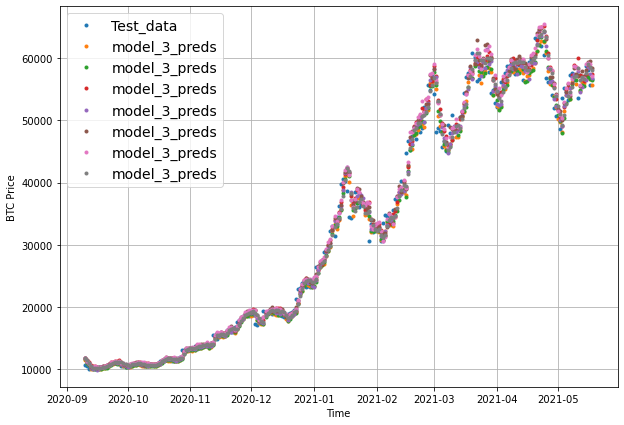

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

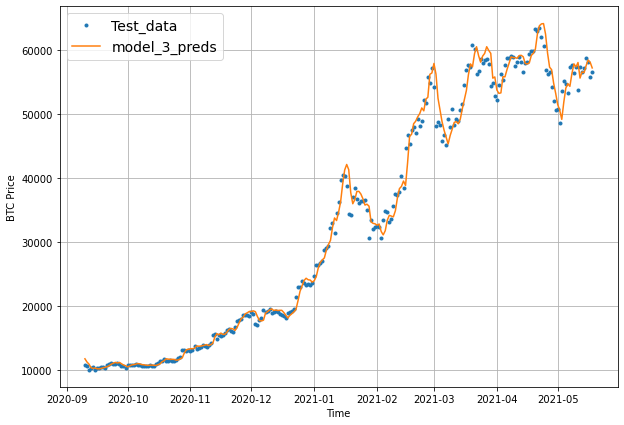

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

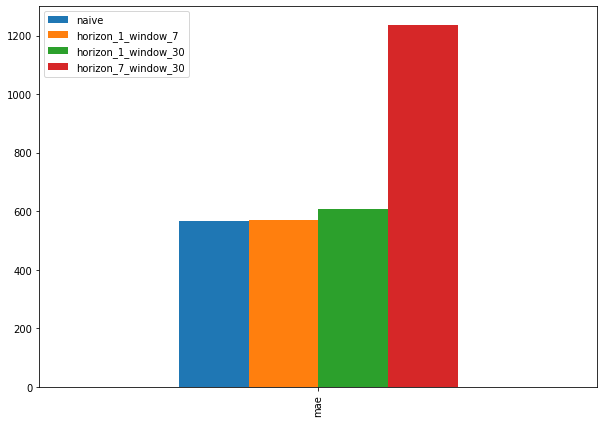

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

model 4: conv1D

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows,full_labels=make_windows(prices,WINDOW_SIZE,HORIZON)

# MAKE TRAIN AND TEST
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels,0.2)


[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# to use the conv1d , we need an input shape of '(batch_size,timesteps,input_dim)'..
# however our data isnt into that shape yet
x=tf.constant(train_windows[0])
x.shape

TensorShape([7])

In [ ]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x,axis=1)) # adds an extra dimension to the input
 

In [ ]:
expand_dims_layer(x).shape

TensorShape([7, 1])

In [ ]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)
],name="model_4_conv1D")

model_4.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics=["mae","mse"])

model_4.fit(x=train_windows,
            y=train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)]
            )

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1360.5215 - mae: 1360.5215 - mse: 5906240.0000   

18/18 [==============================] - 8s 66ms/step - loss: 1207.3817 - mae: 1207.3817 - mse: 5128398.0000 - val_loss: 2320.6218 - val_mae: 2320.6218 - val_mse: 13063541.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 318.9832 - mae: 318.9832 - mse: 415760.2500

18/18 [==============================] - 1s 37ms/step - loss: 316.2171 - mae: 316.2171 - mse: 408753.9375 - val_loss: 1467.2799 - val_mae: 1467.2799 - val_mse: 5375009.5000
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 195.7219 - mae: 195.7219 - mse: 190615.7812

18/18 [==============================] - 1s 37ms/step - loss: 192.6853 - mae: 192.6853 - mse: 187429.8281 - val_loss: 1164.7074 - val_mae: 1164.7074 - val_mse: 3801948.0000
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 177.3535 - mae: 177.3535 - mse: 166088.1562

18/18 [==============================] - 1s 36ms/step - loss: 177.3535 - mae: 177.3535 - mse: 166088.1562 - val_loss: 981.6695 - val_mae: 981.6695 - val_mse: 3154571.5000
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 174.0854 - mae: 174.0854 - mse: 162017.5000

18/18 [==============================] - 1s 40ms/step - loss: 172.3467 - mae: 172.3467 - mse: 159527.5469 - val_loss: 960.8708 - val_mae: 960.8708 - val_mse: 3055978.0000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 170.2479 - mae: 170.2479 - mse: 146161.0781

18/18 [==============================] - 1s 36ms/step - loss: 171.9753 - mae: 171.9753 - mse: 156367.9844 - val_loss: 950.2026 - val_mae: 950.2026 - val_mse: 3054649.0000
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 167.9792 - mae: 167.9792 - mse: 151010.2344

18/18 [==============================] - 1s 37ms/step - loss: 167.1943 - mae: 167.1943 - mse: 149199.9531 - val_loss: 943.2872 - val_mae: 943.2872 - val_mse: 2886476.2500
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 163.2014 - mae: 163.2014 - mse: 145581.8750

18/18 [==============================] - 1s 38ms/step - loss: 163.5990 - mae: 163.5990 - mse: 144668.8438 - val_loss: 905.5262 - val_mae: 905.5262 - val_mse: 2758449.7500
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 162.5455 - mae: 162.5455 - mse: 142410.2344 - val_loss: 929.7607 - val_mae: 929.7607 - val_mse: 2723885.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 158.5780 - mae: 158.5780 - mse: 137094.5781

18/18 [==============================] - 1s 50ms/step - loss: 158.5780 - mae: 158.5780 - mse: 137094.5781 - val_loss: 871.9778 - val_mae: 871.9778 - val_mse: 2543123.0000
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 152.8665 - mae: 152.8665 - mse: 129138.1797

18/18 [==============================] - 1s 39ms/step - loss: 154.0058 - mae: 154.0058 - mse: 129600.4766 - val_loss: 852.7120 - val_mae: 852.7120 - val_mse: 2436986.2500
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 151.2620 - mae: 151.2620 - mse: 124661.1328 - val_loss: 944.1970 - val_mae: 944.1970 - val_mse: 2601012.2500
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 150.2688 - mae: 150.2688 - mse: 125091.0625 - val_loss: 881.1826 - val_mae: 881.1826 - val_mse: 2375321.2500
Epoch 14/100
18/18 [==============================] - ETA: 0s - loss: 145.4593 - mae: 145.4593 - mse: 116202.5312

18/18 [==============================] - 1s 37ms/step - loss: 145.4593 - mae: 145.4593 - mse: 116202.5312 - val_loss: 849.1818 - val_mae: 849.1818 - val_mse: 2246609.2500
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 143.3640 - mae: 143.3640 - mse: 113840.8594

18/18 [==============================] - 1s 37ms/step - loss: 143.3640 - mae: 143.3640 - mse: 113840.8594 - val_loss: 844.4007 - val_mae: 844.4007 - val_mse: 2190368.2500
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 138.2425 - mae: 138.2425 - mse: 105203.6172

18/18 [==============================] - 1s 38ms/step - loss: 139.8764 - mae: 139.8764 - mse: 109100.1953 - val_loss: 806.7261 - val_mae: 806.7261 - val_mse: 2055003.3750
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1677 - mae: 138.1677 - mse: 104690.9531 - val_loss: 812.6340 - val_mae: 812.6340 - val_mse: 2030382.7500
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 139.1615 - mae: 139.1615 - mse: 107938.3828

18/18 [==============================] - 1s 38ms/step - loss: 137.9497 - mae: 137.9497 - mse: 106266.0078 - val_loss: 775.2100 - val_mae: 775.2100 - val_mse: 1904604.6250
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 131.9373 - mae: 131.9373 - mse: 98141.7812

18/18 [==============================] - 1s 36ms/step - loss: 131.1450 - mae: 131.1450 - mse: 97691.8906 - val_loss: 755.4260 - val_mae: 755.4260 - val_mse: 1826982.1250
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 132.2764 - mae: 132.2764 - mse: 100555.9844

18/18 [==============================] - 1s 38ms/step - loss: 132.4057 - mae: 132.4057 - mse: 99905.6719 - val_loss: 712.2014 - val_mae: 712.2014 - val_mse: 1729327.0000
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 130.0737 - mae: 130.0737 - mse: 93090.5859 

18/18 [==============================] - 1s 38ms/step - loss: 131.0829 - mae: 131.0829 - mse: 97808.9531 - val_loss: 707.4122 - val_mae: 707.4122 - val_mse: 1665285.6250
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 126.9511 - mae: 126.9511 - mse: 92542.6797 

18/18 [==============================] - 1s 37ms/step - loss: 126.9511 - mae: 126.9511 - mse: 92542.6797 - val_loss: 692.9736 - val_mae: 692.9736 - val_mse: 1612671.2500
Epoch 23/100
12/18 [===================>..........] - ETA: 0s - loss: 121.0175 - mae: 121.0175 - mse: 77092.0234

18/18 [==============================] - 1s 57ms/step - loss: 125.1489 - mae: 125.1489 - mse: 89912.6797 - val_loss: 682.4753 - val_mae: 682.4753 - val_mse: 1570821.5000
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 125.9749 - mae: 125.9749 - mse: 90451.1172

18/18 [==============================] - 1s 38ms/step - loss: 124.3786 - mae: 124.3786 - mse: 88815.1328 - val_loss: 670.8320 - val_mae: 670.8320 - val_mse: 1547312.1250
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 122.1697 - mae: 122.1697 - mse: 86033.5703

18/18 [==============================] - 1s 39ms/step - loss: 121.6896 - mae: 121.6896 - mse: 85134.2266 - val_loss: 662.6083 - val_mae: 662.6083 - val_mse: 1515859.3750
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 122.1022 - mae: 122.1022 - mse: 78359.3203

18/18 [==============================] - 1s 37ms/step - loss: 121.5705 - mae: 121.5705 - mse: 84747.4922 - val_loss: 654.6090 - val_mae: 654.6090 - val_mse: 1471183.1250
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 122.2792 - mae: 122.2792 - mse: 82573.8047 

18/18 [==============================] - 1s 39ms/step - loss: 122.6445 - mae: 122.6445 - mse: 84560.6562 - val_loss: 650.9058 - val_mae: 650.9058 - val_mse: 1442083.0000
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 116.1494 - mae: 116.1494 - mse: 81109.0859

18/18 [==============================] - 1s 39ms/step - loss: 117.9562 - mae: 117.9562 - mse: 81453.9219 - val_loss: 645.4808 - val_mae: 645.4808 - val_mse: 1420867.6250
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 118.4282 - mae: 118.4282 - mse: 84463.7109

18/18 [==============================] - 1s 40ms/step - loss: 117.1769 - mae: 117.1769 - mse: 80815.1797 - val_loss: 639.9748 - val_mae: 639.9748 - val_mse: 1400477.7500
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6302 - mae: 121.6302 - mse: 83278.4531

18/18 [==============================] - 1s 37ms/step - loss: 121.0468 - mae: 121.0468 - mse: 82429.1094 - val_loss: 630.7950 - val_mae: 630.7950 - val_mse: 1388349.3750
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9061 - mae: 114.9061 - mse: 78196.6953 - val_loss: 652.6464 - val_mae: 652.6464 - val_mse: 1413817.7500
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0335 - mae: 117.0335 - mse: 82178.4531

18/18 [==============================] - 1s 37ms/step - loss: 116.4313 - mae: 116.4313 - mse: 81174.0234 - val_loss: 623.4980 - val_mae: 623.4980 - val_mse: 1350015.8750
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7972 - mae: 115.7972 - mse: 78665.5938 - val_loss: 664.3209 - val_mae: 664.3209 - val_mse: 1430615.8750
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 116.6074 - mae: 116.6074 - mse: 80828.5234 

18/18 [==============================] - 1s 38ms/step - loss: 117.2043 - mae: 117.2043 - mse: 80827.8750 - val_loss: 613.7654 - val_mae: 613.7654 - val_mse: 1334183.3750
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4074 - mae: 113.4074 - mse: 78210.3125 - val_loss: 619.6227 - val_mae: 619.6227 - val_mse: 1348779.8750
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7781 - mae: 116.7781 - mse: 78945.3828 

18/18 [==============================] - 1s 37ms/step - loss: 116.8330 - mae: 116.8330 - mse: 78300.6875 - val_loss: 605.7616 - val_mae: 605.7616 - val_mse: 1305431.5000
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 114.2719 - mae: 114.2719 - mse: 77550.5078 

18/18 [==============================] - 1s 53ms/step - loss: 114.7925 - mae: 114.7925 - mse: 79040.6562 - val_loss: 603.6094 - val_mae: 603.6094 - val_mse: 1294560.0000
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 114.1434 - mae: 114.1434 - mse: 79251.1172

18/18 [==============================] - 1s 38ms/step - loss: 113.0861 - mae: 113.0861 - mse: 77563.4375 - val_loss: 602.5891 - val_mae: 602.5891 - val_mse: 1295688.1250
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 111.3780 - mae: 111.3780 - mse: 75417.9375 

18/18 [==============================] - 1s 37ms/step - loss: 111.9831 - mae: 111.9831 - mse: 75947.3672 - val_loss: 602.2945 - val_mae: 602.2945 - val_mse: 1280478.1250
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 111.2691 - mae: 111.2691 - mse: 74966.6172

18/18 [==============================] - 1s 37ms/step - loss: 111.2691 - mae: 111.2691 - mse: 74966.6172 - val_loss: 600.5515 - val_mae: 600.5515 - val_mse: 1286574.0000
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0727 - mae: 112.0727 - mse: 76083.7734 - val_loss: 623.0615 - val_mae: 623.0615 - val_mse: 1344014.5000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7095 - mae: 116.7095 - mse: 79633.6172 - val_loss: 645.0155 - val_mae: 645.0155 - val_mse: 1360183.7500
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9676 - mae: 118.9676 - mse: 76665.8672 - val_loss: 659.5667 - val_mae: 659.5667 - val_mse: 1435150.0000
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4497 - mae: 125.4497 - mse: 84966.2109 - val_loss: 678.8228 - val_mae: 678.8228 - val_mse: 1486618.5000
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4361 - mae: 115.4361 - m

18/18 [==============================] - 1s 38ms/step - loss: 114.1717 - mae: 114.1717 - mse: 75834.5469 - val_loss: 589.6738 - val_mae: 589.6738 - val_mse: 1249182.1250
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7248 - mae: 113.7248 - mse: 77126.5000 - val_loss: 720.2481 - val_mae: 720.2481 - val_mse: 1539007.0000
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0136 - mae: 112.0136 - mse: 74307.4766 - val_loss: 597.4332 - val_mae: 597.4332 - val_mse: 1251159.2500
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5680 - mae: 110.5680 - mse: 74564.1094 - val_loss: 665.2030 - val_mae: 665.2030 - val_mse: 1391443.2500
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 119.7653 - mae: 119.7653 - mse: 78599.2812 - val_loss: 635.1696 - val_mae: 635.1696 - val_mse: 1326078.8750
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 111.1653 - mae: 111.1653 - mse: 

18/18 [==============================] - 1s 37ms/step - loss: 110.7739 - mae: 110.7739 - mse: 72887.1484 - val_loss: 586.0245 - val_mae: 586.0245 - val_mse: 1230914.5000
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2179 - mae: 111.2179 - mse: 75390.1172 - val_loss: 595.2483 - val_mae: 595.2483 - val_mse: 1259352.8750
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6466 - mae: 113.6466 - mse: 75888.1406 - val_loss: 670.5778 - val_mae: 670.5778 - val_mse: 1404337.5000
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 126.7883 - mae: 126.7883 - mse: 84224.8828 - val_loss: 648.2971 - val_mae: 648.2971 - val_mse: 1349457.0000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6968 - mae: 110.6968 - mse: 73118.6250 - val_loss: 593.8555 - val_mae: 593.8555 - val_mse: 1253418.3750
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8592 - mae: 109.8592 - m

18/18 [==============================] - 1s 36ms/step - loss: 108.1684 - mae: 108.1684 - mse: 71816.4766 - val_loss: 577.6281 - val_mae: 577.6281 - val_mse: 1210658.5000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7932 - mae: 108.7932 - mse: 72142.8438 - val_loss: 610.1495 - val_mae: 610.1495 - val_mse: 1257679.2500
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4675 - mae: 110.4675 - mse: 72716.8594 - val_loss: 652.9427 - val_mae: 652.9427 - val_mse: 1345044.0000
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7312 - mae: 110.7312 - mse: 73138.0078 - val_loss: 583.0664 - val_mae: 583.0664 - val_mse: 1220851.7500
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3487 - mae: 108.3487 - mse: 71602.4609 - val_loss: 587.8362 - val_mae: 587.8362 - val_mse: 1217078.8750
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0646 - mae: 108.0646 - m

18/18 [==============================] - 1s 38ms/step - loss: 106.6291 - mae: 106.6291 - mse: 70787.0469 - val_loss: 575.4403 - val_mae: 575.4403 - val_mse: 1188854.5000
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 112.8470 - mae: 112.8470 - mse: 73494.0547 

18/18 [==============================] - 1s 36ms/step - loss: 114.2934 - mae: 114.2934 - mse: 76018.5625 - val_loss: 571.6199 - val_mae: 571.6199 - val_mse: 1187042.2500
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1759 - mae: 111.1759 - mse: 73076.8438 - val_loss: 666.0590 - val_mae: 666.0590 - val_mse: 1412631.5000
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2543 - mae: 112.2543 - mse: 73349.9531 - val_loss: 580.0314 - val_mae: 580.0314 - val_mse: 1207805.2500
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7741 - mae: 107.7741 - mse: 71110.7266 - val_loss: 599.6221 - val_mae: 599.6221 - val_mse: 1227340.8750
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7533 - mae: 108.7533 - mse: 70520.8906 - val_loss: 599.0880 - val_mae: 599.0880 - val_mse: 1224121.1250
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9682 - mae: 106.9682 - m

18/18 [==============================] - 1s 38ms/step - loss: 107.3045 - mae: 107.3045 - mse: 70395.3672 - val_loss: 570.8284 - val_mae: 570.8284 - val_mse: 1176671.2500
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0094 - mae: 108.0094 - mse: 68407.0469 - val_loss: 642.3939 - val_mae: 642.3939 - val_mse: 1315218.7500
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7574 - mae: 113.7574 - mse: 74075.8281 - val_loss: 625.3716 - val_mae: 625.3716 - val_mse: 1308408.6250
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0017 - mae: 108.0017 - mse: 71807.3828 - val_loss: 627.3054 - val_mae: 627.3054 - val_mse: 1310373.0000
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0999 - mae: 118.0999 - mse: 76482.9141 - val_loss: 637.1274 - val_mae: 637.1274 - val_mse: 1337077.1250
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3195 - mae: 111.3195 - m

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4=tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8284 - mae: 570.8284 - mse: 1176671.2500


[570.828369140625, 570.828369140625, 1176671.25]

In [ ]:
model_4_preds= make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.47 , 8983.927, 8759.671, 8703.627, 8708.294,
       8661.667, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
model_4_results=evaluate_preds(tf.squeeze(test_labels),model_4_preds)
model_4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rmse': 1084.7448,
 'mape': 2.5593357,
 'mase': 1.0027874}

model 5: RNN (lstm)


In [ ]:
tf.random.set_seed(42)

inputs= layers.Input(shape=(WINDOW_SIZE))
x= layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
# x= layers.LSTM(128,return_sequences=True)(x)
x= layers.LSTM(128,activation="relu")(x)
x= layers.Dense(32, activation="relu")(x)
output=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs=inputs,outputs=output, name="lstm_model_5")

model_5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,train_labels,epochs=100,verbose=1,batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


Epoch 1/100
18/18 [==============================] - 4s 114ms/step - loss: 2430.3960 - val_loss: 9471.2344
Epoch 2/100
18/18 [==============================] - 4s 209ms/step - loss: 653.4048 - val_loss: 1945.4353
Epoch 3/100
18/18 [==============================] - 4s 235ms/step - loss: 217.8997 - val_loss: 993.6396
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 182.8415 - val_loss: 1053.0714
Epoch 5/100
18/18 [==============================] - 2s 130ms/step - loss: 180.3832 - val_loss: 969.9511
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 177.2040 - val_loss: 993.2447
Epoch 7/100
18/18 [==============================] - 2s 105ms/step - loss: 171.0074 - val_loss: 929.4769
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 159.0419 - val_loss: 1168.5238
Epoch 9/100
18/18 [==============================] - 2s 133ms/step - loss: 168.5740 - val_loss: 905.4762
Epoch 10/100
18/18 [==============================] - 3

In [ ]:
model_5=tf.keras.models.load_model("/content/model_experiments/lstm_model_5")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 582.6221


582.6220703125

In [ ]:
model_5_preds=make_preds(model_5,test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8856.167, 8708.51 , 8937.245, 8737.986, 8674.841], dtype=float32)>

In [ ]:
model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)
model_5_results

{'mae': 582.6222,
 'mse': 1211086.2,
 'rmse': 1100.4937,
 'mape': 2.6325474,
 'mase': 1.0235058}

lets make a multivariete time series dataset

add bitcoin halving event in the dataset

In [ ]:
block_reward_1= 50 #3 january 2009- this block reward not posible in our dataset
block_reward_2= 25 # not possible
block_reward_3= 12.5 # 9 july 2016 
block_reward_4= 6.25 # 18 may 2020



In [ ]:
block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")


In [ ]:
# create data ranges where specific block values would be
block_reward_2_days= (block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days= (block_reward_4_datetime-bitcoin_prices.index[0]).days

block_reward_2_days,block_reward_3_days

(1012, 2421)

In [ ]:
# adding a block reward column
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

# add the values in the column
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3 
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4



In [ ]:
bitcoin_prices_block.tail()

,Closing Price (USD),block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


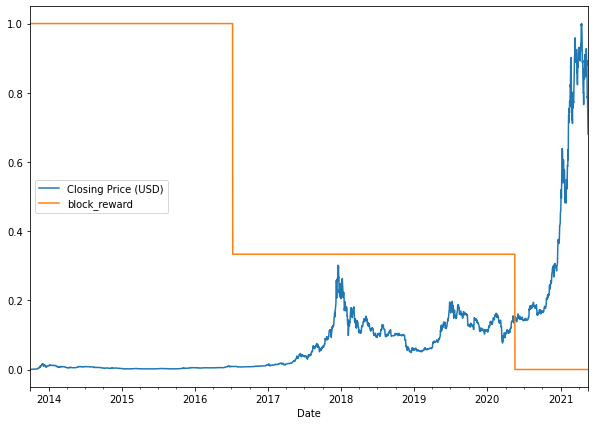

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Closing Price (USD)", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

# making windowed dataset with pandas
previously we turned our univariet data into windows using the helper functions, but now we have multi variet data hence cannot use it now.
Now we will use pandas dataframe shift method.


In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
# MAKE A COPY OF THE DATA WITH BLOCK REWARD

bitcoin_prices_windowed= bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"]=bitcoin_prices_windowed["Closing Price (USD)"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Closing Price (USD),block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Closing Price (USD)", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Closing Price (USD)"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rmse': 1079.2666,
 'mape': 2.5460758,
 'mase': 0.99762523}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

N-BEATS (NEURAL BASIS EXPANSION ANALYSIS FOR INTERPRETABLE TIME SERIES FORECASTING) ALGORITHM 

In [ ]:
# building and testing the n beats block layer
# because the n beats block layer doesnt exist in tf,hence we need to create is using sub-classing

In [ ]:
import tensorflow as tf
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast
     

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)
     

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Closing Price (USD)"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Closing Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Closing Price (USD)", axis=1)
y = bitcoin_prices_nbeats.dropna()["Closing Price (USD)"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels (features,labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
from tensorflow.keras import layers
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


Building, compiling and fitting the N-BEATS algorithm
Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:

1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

# 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 312: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 412: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 15s, sys: 1.92 s, total: 1min 17s
Wall time: 1min 21s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 95ms/step - loss: 584.3943 - mae: 584.3943 - mse: 1184402.3750


[584.3943481445312, 584.3943481445312, 1184402.375]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8947.494, 8831.615, 9051.766, 8829.273, 8732.015, 8791.708,
       8670.262, 8560.478, 8487.313, 8534.347], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results
     

{'mae': 584.39435,
 'mse': 1184402.4,
 'rmse': 1088.3025,
 'mape': 2.7460237,
 'mase': 1.026619}

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)
     

model 8: creating an ensemble (stacking different models together)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      
      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models
     

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 402: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 262: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 362: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 277: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 377: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 368: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 468: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 222: ReduceLROnPlateau reduci

In [ ]:
len(ensemble_models)

15

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8864.702 ,  8742.716 ,  9131.178 , ..., 49154.633 , 49523.73  ,
        45446.668 ],
       [ 8784.735 ,  8741.767 ,  8994.167 , ..., 49941.715 , 48364.785 ,
        46545.45  ],
       [ 8800.718 ,  8761.968 ,  9052.507 , ..., 49812.723 , 47779.79  ,
        45531.273 ],
       ...,
       [ 8777.0205,  8763.775 ,  9061.077 , ..., 50064.223 , 49472.68  ,
        45771.207 ],
       [ 8791.024 ,  8741.375 ,  9045.285 , ..., 50090.54  , 48444.47  ,
        46450.406 ],
       [ 8797.434 ,  8776.359 ,  9071.176 , ..., 49622.918 , 48061.105 ,
        46365.754 ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results
     

{'mae': 567.7398,
 'mse': 1144965.6,
 'rmse': 1070.0306,
 'mape': 2.5616353,
 'mase': 0.9973616}

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.mean(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results
     

{'mae': 567.5587,
 'mse': 1144358.1,
 'rmse': 1069.7467,
 'mape': 2.555836,
 'mase': 0.9970435}

Model 9: Train a model on the full historical data to make predictions into future

In [ ]:
bitcoin_prices_windowed.head()

# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all
     

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before
     

Make predictions on the future

In [ ]:

# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 day

To do so, we'll build the following steps:

1.Function which takes as input:
  a list of values (the Bitcoin historical data)
  a trained model (such as model_9)
  a window into the future to predict (our INTO_FUTURE variable)
  the window size a model was trained on (WINDOW_SIZE) - the model can    only predict on the same kind of data it was trained on

2.Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)


3.Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction
  Eventually future predictions will be made using the model's own previous predictions as input

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Plot future forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date
     

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep
     

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps


In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

In [ ]:

# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")
     